<a href="https://colab.research.google.com/github/gauravreddy08/deep-learning-tensorflow/blob/main/notebooks/01-regression-tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Regression using Tensorflow**

**Regression :** Predicting a Number

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


## **Creating data to view and fit**

Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

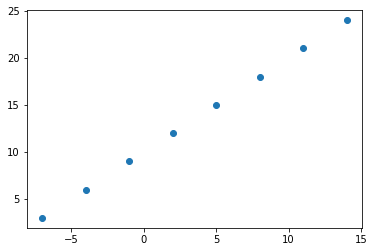

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7, -4, -1, 2, 5, 8, 11, 14])
y = np.array([3, 6, 9, 12, 15, 18, 21, 24])

plt.scatter(X, y)

## **Input and Output Shapes**

In [5]:
# Demo Tensor for Housing Price Problem

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([937000])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [6]:
# Turning NumPy arrays into Tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

## **Steps in modelling**

1. **Creating the model** - Define input and ouput layers, as well as the hidden layers of DL Model.
2. **Compiling the model** - define the loss function, Optimizier and Evaluation Metrics.
3. **Fitting the model** - letting our model find patterns between X any y.

In [7]:
tf.random.set_seed(42)

# 1. Creating model using Sequential API
model  = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), #SGD : Stochastic Gradient Descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 494ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [8]:
model.predict([17])

array([[12.716021]], dtype=float32)

## **Improving the model**

We can improve our model, by altering the steps we took to create a model.


1.   **Creating the Model :** here we might add more layers, increase the no. of hidden units/neurons within each of the hidden layers, change the activation function of each layer.
2.   **Compling the model:** here we might change the Optimizer functions or perhaps the *Learning Rate* of Optimization Function.
3.   **Fitting the model :** here we might fit the model for more **epochs** or on more data.



### **Increasing EPOCHS**

In [ ]:
tf.random.set_seed(42)

# 1. Creating model using Sequential API
model  = tf.keras.Sequential([     
  tf.keras.layers.Dense(100, activation=None),                   
  tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.001), #SGD : Stochastic Gradient Descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs = 100)

In [11]:
model.predict([17]) 

array([[30.624022]], dtype=float32)

See even tho the loss is averged at 6.3473 the predicted value is 14 more than true value, this is due to over fitting.

**OverFitting :** The model learned the train data so well that it doesnt know what to do with a foreign data (test data)

### **Changing Learning Rate**

In [ ]:
tf.random.set_seed(42)

# 1. Creating model using Sequential API
model  = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),                          
  tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01), #SGD : Stochastic Gradient Descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs = 100)

In [13]:
model.predict([17]) #True Value : 27

array([[26.206877]], dtype=float32)

## **Evaluating our Model**

### **Splitting the Data**

In [14]:
# First let us increase our data

X = tf.range(-100, 100, 4)
X, len(X)

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>, 50)

In [15]:
y = X+10
y, len(y)

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 50)

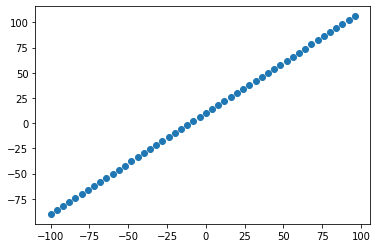

In [16]:
plt.scatter(X, y)

**Train Data** : 70-80%

**Validation Data** : 10-15%

**Test Data** : 10-15%

In [17]:
X_train = X[:40] #first 40 training samples : 80% of the data
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## **Visualizing the Predictions**

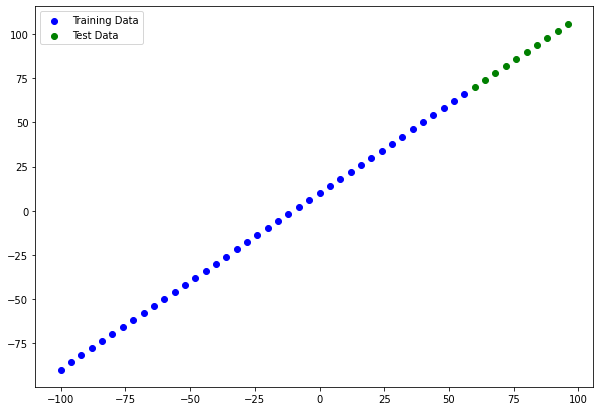

In [31]:
plt.figure(figsize = (10,7))

plt.scatter(X_train, y_train, c='b', label="Training Data")
plt.scatter(X_test, y_test, c='g', label="Test Data")
plt.legend();

In [32]:
# Creating a model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fitting the Model 
# model.fit(X_train, y_train, epochs=100)


In [33]:
# # Visualizing our Model
# model.summary()

To use `model.summary()` we need to either `fit` the model or `build` the model

`model.build()` `takes input_shape` as an arguement so instead of using `build()` we could also `input_shape` in first layer(s) for automatic build.

In [ ]:
# Creating a model
# input_shape is 1 cause we are passing 1 number to get 1 number
tf.random.set_seed(42)

model = tf.keras.Sequential([            
  tf.keras.layers.Dense(1, input_shape=[1])
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fitting the Model 
model.fit(X_train, y_train, epochs=100)


In [35]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


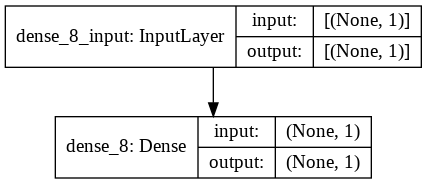

In [36]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [37]:
y_pred = model.predict(y_test)
y_pred

array([[62.28419 ],
       [65.76943 ],
       [69.25468 ],
       [72.739914],
       [76.22515 ],
       [79.710396],
       [83.19563 ],
       [86.68087 ],
       [90.16611 ],
       [93.65135 ]], dtype=float32)

In [38]:
def plot_preds(train_data = X_train, train_label = y_train,
               test_data = X_test, test_label = y_test,
               predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label, c='b', label="Train Data")
  plt.scatter(test_data, test_label, c='g', label="Test Data")
  plt.scatter(test_data, predictions, c='r', label="Predicted Data")#
  plt.legend();

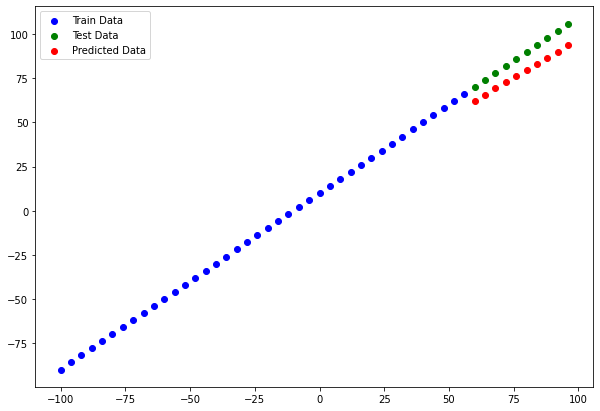

In [39]:
plot_preds()

In [40]:
model.evaluate(y_pred, y_test)

1/1 [==============================] - 0s 87ms/step - loss: 18.7734 - mae: 18.7734


[18.773406982421875, 18.773406982421875]

In [41]:
# Calculate the MAE 
tf.metrics.mean_absolute_error(y_test, y_pred)
# You might have expected a single value instead 
# you got bunch of valuea, reason is
y_pred.shape, y_test.shape

((10, 1), TensorShape([10]))

In [42]:
mod_pred = tf.constant(tf.squeeze(y_pred.T))
tf.metrics.mean_absolute_error(y_test, mod_pred), tf.metrics.mean_squared_error(y_test, mod_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=10.032228>,
 <tf.Tensor: shape=(), dtype=float32, numpy=102.831665>)

## **Running experiments to improve a model**

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

### **Building `model_1`**

In [43]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss:

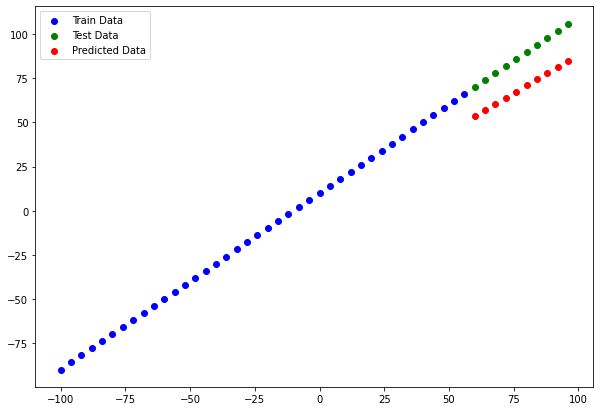

In [44]:
y_preds_1 = model_1.predict(X_test)
plot_preds(predictions=y_preds_1)

In [45]:
mae_1 = tf.metrics.mae(y_test, y_preds_1)
mse_1 = tf.metrics.mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
        14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1317.3499 , 1089.5106 ,  885.9652 ,  706.71387,  551.7559 ,
         421.0921 ,  314.72183,  232.64555,  174.86307,  141.37428],
       dtype=float32)>)

### **Building `model_2`**

In [46]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=2) # set verbose to 0 for less output

Epoch 1/100
2/2 - 0s - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 - 0s - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 - 0s - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 - 0s - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 - 0s - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 - 0s - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 - 0s - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 - 0s - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 - 0s - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 - 0s - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 - 0s - loss: 10.2375 - mae: 10.2375
Epoch 12/100
2/2 - 0s - loss: 25.1960 - mae: 25.1960
Epoch 13/100
2/2 - 0s - loss: 17.0177 - mae: 17.0177
Epoch 14/100
2/2 - 0s - loss: 25.9747 - mae: 25.9747
Epoch 15/100
2/2 - 0s - loss: 18.0366 - mae: 18.0366
Epoch 16/100
2/2 - 0s - loss: 7.3513 - mae: 7.3513
Epoch 17/100
2/2 - 0s - loss: 10.8516 - mae: 10.8516
Epoch 18/100
2/2 - 0s - loss: 19.5119 - mae: 19.5119
Epoch 19/100
2/2 - 0s - loss: 10.3378 - mae: 10.3378
Epoch 

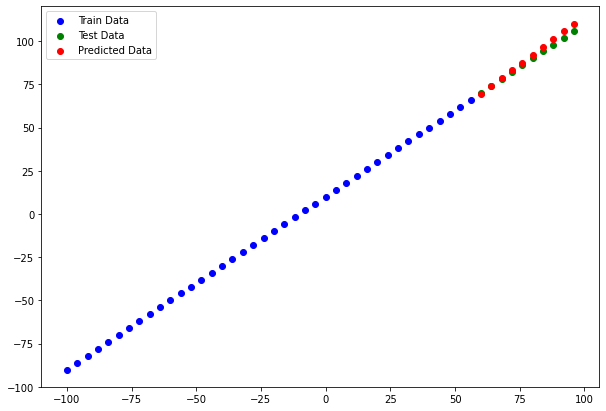

In [47]:
y_preds_2 = model_2.predict(X_test)
plot_preds(predictions=y_preds_2)

In [48]:
mae_2 = tf.metrics.mae(y_test, y_preds_2);
mse_2 = tf.metrics.mse(y_test, y_preds_2);
mae_2, mse_2

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([18.532799, 14.811444, 12.198331, 10.595467, 10.      , 10.411928,
        11.831247, 14.257962, 17.692072, 22.133575], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([475.46466, 328.40076, 222.17073, 156.77385, 132.21054, 148.48068,
        205.58408, 303.521  , 442.29132, 621.89514], dtype=float32)>)

In [49]:
y_preds_2=tf.squeeze(y_preds_2)

In [50]:
y_preds_2.shape

TensorShape([10])

In [51]:
mae_2 = tf.metrics.mae(y_test, y_preds_2);
mse_2 = tf.metrics.mse(y_test, y_preds_2);
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9098114>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.459232>)

### **Building `model_3`**

In [52]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs=500, verbose=2) # set verbose to 0 for less output

Epoch 1/500
2/2 - 0s - loss: 11.3108 - mae: 11.3108
Epoch 2/500
2/2 - 0s - loss: 12.8765 - mae: 12.8765
Epoch 3/500
2/2 - 0s - loss: 14.7778 - mae: 14.7778
Epoch 4/500
2/2 - 0s - loss: 10.6099 - mae: 10.6099
Epoch 5/500
2/2 - 0s - loss: 13.1996 - mae: 13.1996
Epoch 6/500
2/2 - 0s - loss: 10.4335 - mae: 10.4335
Epoch 7/500
2/2 - 0s - loss: 12.3838 - mae: 12.3838
Epoch 8/500
2/2 - 0s - loss: 12.1526 - mae: 12.1526
Epoch 9/500
2/2 - 0s - loss: 29.1764 - mae: 29.1764
Epoch 10/500
2/2 - 0s - loss: 19.3046 - mae: 19.3046
Epoch 11/500
2/2 - 0s - loss: 12.2623 - mae: 12.2623
Epoch 12/500
2/2 - 0s - loss: 22.0045 - mae: 22.0045
Epoch 13/500
2/2 - 0s - loss: 24.3666 - mae: 24.3666
Epoch 14/500
2/2 - 0s - loss: 24.0280 - mae: 24.0280
Epoch 15/500
2/2 - 0s - loss: 14.6971 - mae: 14.6971
Epoch 16/500
2/2 - 0s - loss: 6.7072 - mae: 6.7072
Epoch 17/500
2/2 - 0s - loss: 22.3470 - mae: 22.3470
Epoch 18/500
2/2 - 0s - loss: 10.2393 - mae: 10.2393
Epoch 19/500
2/2 - 0s - loss: 19.9843 - mae: 19.9843
Epoc

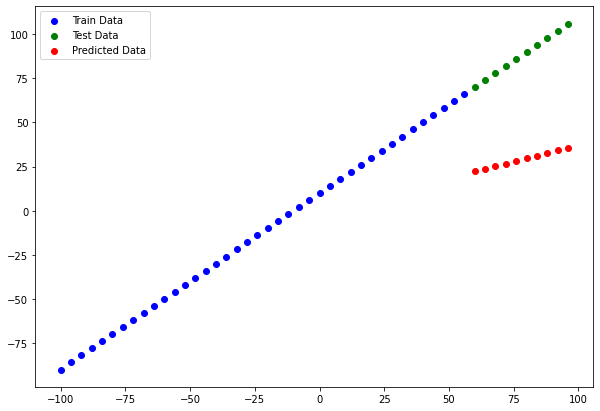

In [53]:
y_preds_3 = model_3.predict(X_test)
plot_preds(predictions=y_preds_3)

In [54]:
y_preds_3=tf.squeeze(y_preds_3)
mae_3 = tf.metrics.mae(y_test, y_preds_3);
mse_3 = tf.metrics.mse(y_test, y_preds_3);
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=59.05909>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3540.1946>)

## **Comparing Results**


In [55]:
model_results = [["model_1", mae_1, mse_3],
                ["model_2", mae_2, mse_2],
                ["model_3", mae_3, mse_3]]

In [56]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,"(tf.Tensor(34.42891, shape=(), dtype=float32),...","tf.Tensor(3540.1946, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(1.9098114, shape=(), dtype=float32)","tf.Tensor(5.459232, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(59.05909, shape=(), dtype=float32)","tf.Tensor(3540.1946, shape=(), dtype=float32)"


In [57]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
